Tienes un archivo CSV que contiene datos de ventas de una tienda. El archivo tiene la siguiente estructura:  

id,producto,fecha,precio,cantidad  
1,Manzanas,2023-01-01,1.2,10  
2,Naranjas,2023-01-01,0.8,5  
3,Manzanas,2023-01-02,1.2,7  
4,Plátanos,2023-01-02,0.5,20  
5,Plátanos,2023-01-03,0.5,15  
6,Naranjas,2023-01-03,0.8,7  
7,Manzanas,2023-01-03,1.2,3  

Escribir un programa en Python que lea el archivo CSV y realice las siguientes tareas:

Cargar los datos desde el archivo CSV.
Calcular el total de ingresos generados por cada producto.
Determinar el día con mayores ventas (en términos de ingresos).
Generar un gráfico de barras que muestre los ingresos totales por producto.
Requisitos:

Utiliza pandas para la manipulación de datos.
Utiliza matplotlib o seaborn para la visualización de los datos.
El programa debe ser modular, utilizando funciones para cada una de las tareas.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    "id": [1,2,3,4,5,6,7],
    "producto":["Manzanas","Naranjas","Manzanas","Plátanos","Plátanos","Naranjas","Manzanas"],
    "fecha":["2023-01-01", "2023-01-01", "2023-01-02", "2023-01-02", "2023-01-03", "2023-01-03", "2023-01-03"],
    "precio":[1.2, 0.8, 1.2, 0.5, 0.5, 0.8, 1.2],
    "cantidad":[10, 5, 7, 20, 15, 7, 3]
}

df = pd.DataFrame(data)



In [3]:
df

,id,producto,fecha,precio,cantidad
0,1,Manzanas,2023-01-01,1.2,10
1,2,Naranjas,2023-01-01,0.8,5
2,3,Manzanas,2023-01-02,1.2,7
3,4,Plátanos,2023-01-02,0.5,20
4,5,Plátanos,2023-01-03,0.5,15
5,6,Naranjas,2023-01-03,0.8,7
6,7,Manzanas,2023-01-03,1.2,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        7 non-null      int64  
 1   producto  7 non-null      object 
 2   fecha     7 non-null      object 
 3   precio    7 non-null      float64
 4   cantidad  7 non-null      int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 412.0+ bytes


In [6]:
df['fecha'] = pd.to_datetime(df['fecha'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        7 non-null      int64         
 1   producto  7 non-null      object        
 2   fecha     7 non-null      datetime64[ns]
 3   precio    7 non-null      float64       
 4   cantidad  7 non-null      int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 412.0+ bytes


In [9]:
df.to_csv('ventas.csv', index=False)

Ingresos por producto:
producto
Manzanas    24.0
Naranjas     9.6
Plátanos    17.5
Name: ingreso, dtype: float64
El día con mayores ventas es 2023-01-02 con un ingreso de 18.40


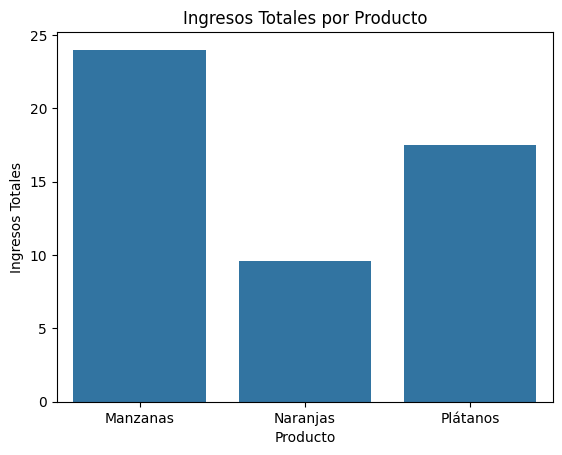

In [10]:
def cargar_datos(archivo):
    """
    Carga los datos desde un archivo CSV y los devuelve como un DataFrame de pandas.
    """
    return pd.read_csv(archivo)

def calcular_ingresos_por_producto(df):
    """
    Calcula los ingresos totales generados por cada producto.
    """
    df['ingreso'] = df['precio'] * df['cantidad']
    ingresos_por_producto = df.groupby('producto')['ingreso'].sum()
    return ingresos_por_producto

def dia_mayores_ventas(df):
    """
    Determina el día con mayores ventas en términos de ingresos.
    """
    df['ingreso'] = df['precio'] * df['cantidad']
    ingresos_por_dia = df.groupby('fecha')['ingreso'].sum()
    dia_max_ventas = ingresos_por_dia.idxmax()
    return dia_max_ventas, ingresos_por_dia[dia_max_ventas]

def graficar_ingresos(ingresos_por_producto):
    """
    Genera un gráfico de barras que muestra los ingresos totales por producto.
    """
    sns.barplot(x=ingresos_por_producto.index, y=ingresos_por_producto.values)
    plt.xlabel('Producto')
    plt.ylabel('Ingresos Totales')
    plt.title('Ingresos Totales por Producto')
    plt.show()

if __name__ == "__main__":
    archivo = 'ventas.csv'  # Reemplaza esto con la ruta a tu archivo CSV
    df = cargar_datos(archivo)

    
    ingresos_por_producto = calcular_ingresos_por_producto(df)
    print("Ingresos por producto:")
    print(ingresos_por_producto)
    
    dia_max_ventas, ingreso_max_dia = dia_mayores_ventas(df)
    print(f"El día con mayores ventas es {dia_max_ventas} con un ingreso de {ingreso_max_dia:.2f}")
    
    graficar_ingresos(ingresos_por_producto)


Ejercicio: Análisis de Datos de Ventas con Pandas  
Enunciado:  

Tienes un conjunto de datos de ventas almacenado en un DataFrame de pandas.  
El DataFrame contiene la siguiente información sobre las ventas diarias de una tienda:  

Tu tarea es escribir un programa en Python que realice las siguientes operaciones utilizando pandas:  

Calcular el total de ventas de la semana.  
Encontrar el día con las ventas más altas y el día con las ventas más bajas.  
Calcular la media de las ventas diarias.  
Generar un nuevo DataFrame que contenga solo los días con ventas por encima de la media.  
Generar un nuevo DataFrame que contenga solo los días con ventas por debajo de la media.  
Requisitos:  

Utiliza las funciones y métodos de pandas para realizar cada operación.  
Asegúrate de imprimir los resultados de cada operación.  

In [20]:

data = {
    "día": ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"],
    "ventas": [150, 200, 50, 300, 250, 100, 400]
}

df = pd.DataFrame(data)

# Calcular el total de ventas de la semana
total_ventas = df["ventas"].sum()
# Calcular la media de las ventas diarias
media_ventas = df["ventas"].mean()

print(f"Total de ventas: {total_ventas}")
print(f"Media de ventas: {media_ventas:.2f}")

# Encontrar el día con las ventas más altas y más bajas
dia_max_ventas = df.loc[df["ventas"].idxmax()]["día"]
dia_min_ventas = df.loc[df["ventas"].idxmin()]["día"]

print(f"El día con las ventas más altas es: {dia_max_ventas}")
print(f"El día con las ventas más bajas es: {dia_min_ventas}")

# Generar DataFrames para días con ventas por encima y por debajo de la media
df_over_mean = df[df["ventas"] > media_ventas]
df_under_mean = df[df["ventas"] <= media_ventas]

print("Días con ventas por encima de la media:")
df_over_mean

print("Días con ventas por debajo de la media:")
df_under_mean



Total de ventas: 1450
Media de ventas: 207.14
El día con las ventas más altas es: Domingo
El día con las ventas más bajas es: Miércoles
Días con ventas por encima de la media:
Días con ventas por debajo de la media:


,día,ventas
0,Lunes,150
1,Martes,200
2,Miércoles,50
5,Sábado,100
